In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mez_freq = np.load("../Data/MobMat_freq_mezuro.npy")
mez_inc = np.load("../Data/MobMat_inc_mezuro.npy")
df = pd.read_csv("../Data/Mob_grav_freq.csv")
grav_freq = pd.read_csv("../Data/Mob_grav_freq.csv").drop("Unnamed: 0",axis=1).to_numpy()
grav_inc = pd.read_csv("../Data/Mob_grav_inc.csv").drop("Unnamed: 0",axis=1).to_numpy()
# grav 2!
grav2_freq = pd.read_csv("../Data/General/Mob_grav_freq.csv").drop("Unnamed: 0",axis=1).to_numpy()
grav2_inc = pd.read_csv("../Data/General/Mob_grav_inc.csv").drop("Unnamed: 0",axis=1).to_numpy()

In [2]:
print(mez_freq.shape)
print(grav_inc.shape)
print(grav2_inc.shape)
print(df)

(380, 380)
(380, 380)
(380, 380)
           Unnamed: 0  's-Gravenhage  's-Hertogenbosch  Aa en Hunze   Aalburg  \
0       's-Gravenhage            NaN         12.111327     0.858039  1.988618   
1    's-Hertogenbosch      12.111327               NaN     0.335028  0.553863   
2         Aa en Hunze       0.858039          0.335028          NaN  0.023206   
3             Aalburg       1.988618          0.553863     0.023206       NaN   
4            Aalsmeer       5.819463          0.951282     0.062249  0.118842   
..                ...            ...               ...          ...       ...   
375           Zundert       2.772551          0.748250     0.035032  0.206096   
376           Zutphen       2.141346          1.204445     0.193443  0.066195   
377   Zwartewaterland       1.044056          0.477508     0.127898  0.029745   
378       Zwijndrecht      10.314457          1.454643     0.075890  0.469651   
379            Zwolle       5.821290          2.773411     0.702303  0.16858

In [10]:
compare1 = grav_freq
compare2 = grav2_freq

diff_ratio = np.where(compare1!= 0, compare2/compare1, np.nan)
diff_ratio = diff_ratio[~np.isnan(diff_ratio)]

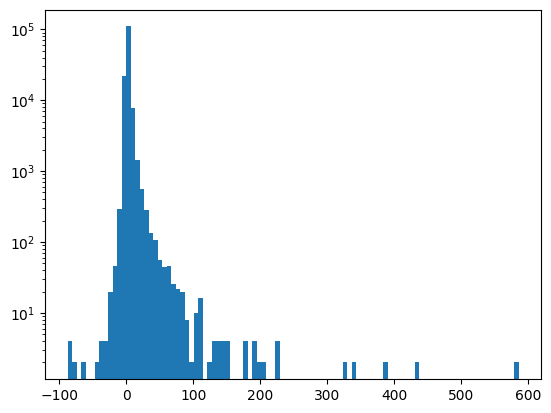

In [11]:
plt.hist(diff_ratio.flatten(), bins=100)
plt.yscale("log")
# plt.xscale("log")

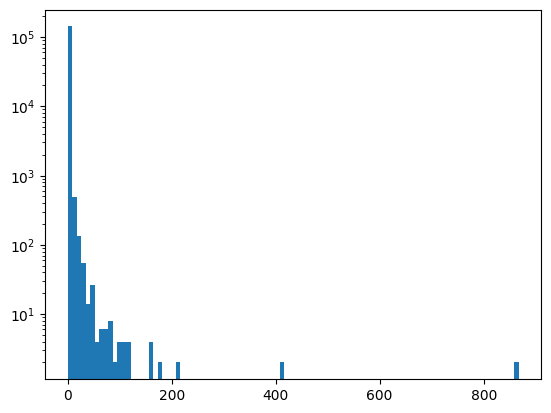

In [7]:
plt.hist(compare1.flatten(), bins=100)
plt.yscale("log")

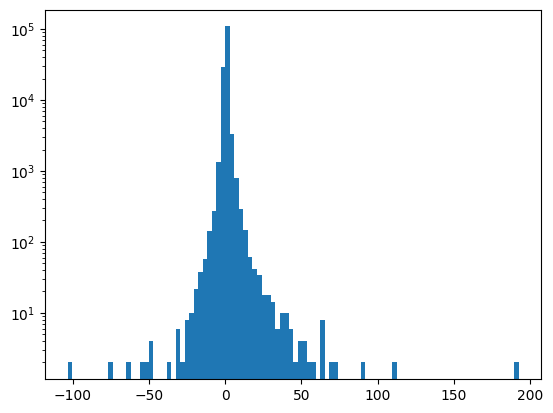

In [8]:
plt.hist(compare2.flatten(), bins=100)
plt.yscale("log")